In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

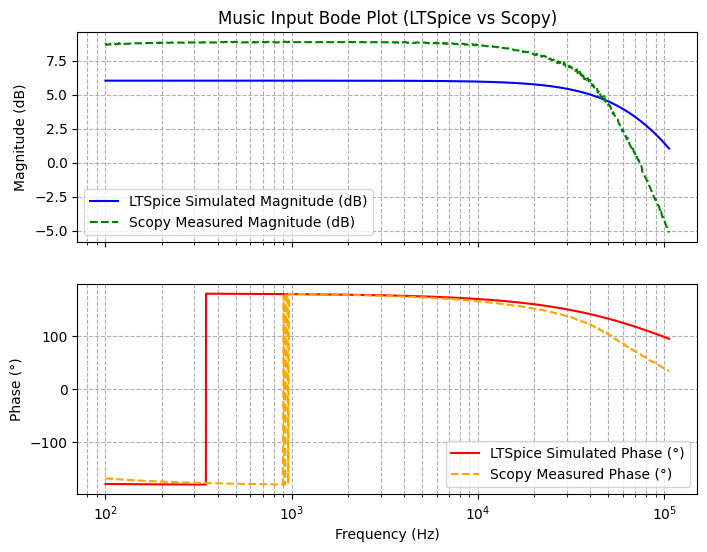

Cutoff Frequency/Frequencies: [  75335.55637336   75509.22276653   75683.28950209   75857.75750291
   76032.62769401   76207.90100253   76383.57835776   76559.66069111
   76736.14893617   76913.04402865   77090.34690643   77268.05850956
   77446.17978024   77624.71166286   77803.65510397   77983.01105231
   78162.78045882   78342.96427661   78523.563461     78704.5789695
   78886.01176184   79067.86279997   79250.13304803   79432.82347242
   79615.93504172   79799.46872679   79983.42550069   80167.80633876
   80352.61221855   80537.84411989   80723.50302487   80909.58991783
   81096.10578537   81283.0516164    81470.42840207   81658.23713585
   81846.47881347   82035.15443297   82224.26499469   82413.81150129
   82603.79495771   82794.21637122   82985.07675143   83176.37711025
   83368.11846195   83560.30182311   83752.92821268   83945.99865193
   84139.51416451   84333.47577641   84527.88451602   84722.74141405
   84918.04750362   85113.80382022   85310.01140175   85506.67128845
   85

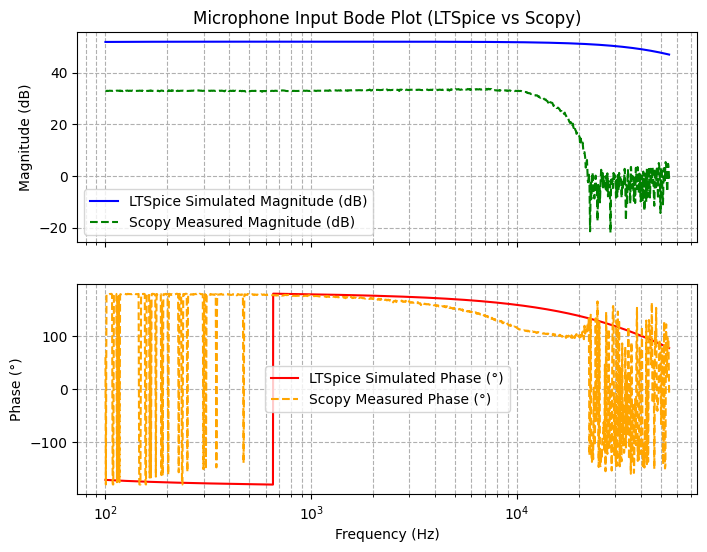

Cutoff Frequency/Frequencies: [  40831.93863326   40926.065973     41020.41029865 ...  995405.41735132
  997700.06382234 1000000.        ] Hz
Phase Shift at Cutoff Frequencies: [ 99.39281427  99.23370731  99.07438691 ... -75.98604995 -76.0181342
 -76.05014567]°


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_bode_plot(ltspice_file, scopy_file, title):
    df_scopy = pd.read_csv(scopy_file, skiprows=6, delimiter=",", header=0)
    df_scopy['Frequency(Hz)'] = pd.to_numeric(df_scopy['Frequency(Hz)'])
    df_scopy['Magnitude(dB)'] = pd.to_numeric(df_scopy['Magnitude(dB)'])
    df_scopy['Phase(°)'] = pd.to_numeric(df_scopy['Phase(°)'])

    df = pd.read_csv(ltspice_file, delimiter="\t", skiprows=1, encoding="ISO-8859-1", names=["Freq", "Magnitude"])
    df[['Magnitude_dB', 'Phase_deg']] = df['Magnitude'].str.extract(r'\((-?[\d\.e\+]+)dB,(-?[\d\.e\+]+)°\)')
    df['Magnitude_dB'] = pd.to_numeric(df['Magnitude_dB'])
    df['Phase_deg'] = pd.to_numeric(df['Phase_deg'])
    df['Freq'] = pd.to_numeric(df['Freq'])

    df = df[df['Freq'] >= 100]

    scopy_magnitude_interp = np.interp(df['Freq'], df_scopy['Frequency(Hz)'], df_scopy['Magnitude(dB)'])
    scopy_phase_interp = np.interp(df['Freq'], df_scopy['Frequency(Hz)'], df_scopy['Phase(°)'])

    max_magnitude = df['Magnitude_dB'].max()
    cutoff_level = max_magnitude - 3  # Cutoff frequency at -3 dB
    stop_level = max_magnitude - 5     # Stop plotting beyond 5 dB drop

    cutoff_indices = df[df['Magnitude_dB'] <= cutoff_level].index
    cutoff_freqs = df.loc[cutoff_indices, 'Freq'].values if len(cutoff_indices) > 0 else []
    phase_at_cutoff = df.loc[cutoff_indices, 'Phase_deg'].values if len(cutoff_indices) > 0 else []

    df = df[df['Magnitude_dB'] >= stop_level]

    fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

    ax[0].semilogx(df['Freq'], df['Magnitude_dB'], label="LTSpice Simulated Magnitude (dB)", color='b')
    ax[0].semilogx(df['Freq'], scopy_magnitude_interp[:len(df)], label="Scopy Measured Magnitude (dB)", color='g', linestyle='dashed')
    ax[0].set_ylabel("Magnitude (dB)")
    ax[0].set_title(title)
    ax[0].legend()
    ax[0].grid(True, which="both", linestyle="--")

    ax[1].semilogx(df['Freq'], df['Phase_deg'], label="LTSpice Simulated Phase (°)", color='r')
    ax[1].semilogx(df['Freq'], scopy_phase_interp[:len(df)], label="Scopy Measured Phase (°)", color='orange', linestyle='dashed')
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_ylabel("Phase (°)")
    ax[1].legend()
    ax[1].grid(True, which="both", linestyle="--")

    plt.show()

    if len(cutoff_freqs) > 0:
        print(f"Cutoff Frequency/Frequencies: {cutoff_freqs} Hz")
        print(f"Phase Shift at Cutoff Frequencies: {phase_at_cutoff}°")
    else:
        print("No clear cutoff frequency found.")

FILE_NAME1 = "/home/art/school/ECE2001-Electrical-Circuits/Designprojects/design1/LTSpiceMusic.txt"
SCOPY_FILE1 = "/home/art/school/ECE2001-Electrical-Circuits/Designprojects/design1/scopygainmusic.csv"
FILE_NAME2 = "/home/art/school/ECE2001-Electrical-Circuits/Designprojects/design1/LTSpiceMic.txt"
SCOPY_FILE2 = "/home/art/school/ECE2001-Electrical-Circuits/Designprojects/design1/scopygainmic.csv"

process_bode_plot(FILE_NAME1, SCOPY_FILE1, "Music Input Bode Plot (LTSpice vs Scopy)")
process_bode_plot(FILE_NAME2, SCOPY_FILE2, "Microphone Input Bode Plot (LTSpice vs Scopy)")